In [1]:
%run ./CoreFunctions.ipynb

In [2]:
playsound(444,444)

In [3]:

    
aLowestValue = -4.0
aHighestValue = 5.0
bLowestValue = -4.0
bHighestValue = 5.0

In [4]:
# Q values come below, after initialize cities array is defined

In [5]:
partition_size = 6

In [6]:
SaveResults = True

In [7]:
#Polush population
Pol_Pop = pd.read_csv("beta_30_Pl_AA.csv")
PolPopulation = np.array(Pol_Pop["SourcePopulation"])
PolPopulation = np.sort(PolPopulation)

N_iterations = 39 
N_cities = len(PolPopulation)
#N_cities = 4 #number of city sizes

In [8]:
# kI  does not! affect the ratio I_p/I_u!
kI = 0.00001

In [9]:
# initialize cities array. The distribution is given manually
if False:
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[0,0] = 1000
        zeta[1,0] = 25369
        zeta[2,0] = 110521
        zeta[3,0] = 787445
        
        zeta[0,1] = 0.09
        zeta[1,1] = 0.05
        zeta[2,1] = 0.85
        zeta[3,1] = 0.01
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

In [10]:
# for Poland all city sizes are unique
if True:   
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[:,0] = PolPopulation
     
        
        zeta[:,1] = 1/N_cities
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

In [11]:
Q_values = np.array([0.01, 0.06, 0.095, 0.107, 0.125, 0.15,  0.2, 0.47, 0.76, 0.93, 0.99]) * maxQ_value()
#Q_values = np.array([0.3,0.88]) * maxQ_value()

In [12]:
Q_values

array([  1120.73918,   6724.43507,  11207.39179,  14009.23974,
        16811.08768,  19612.93563,  22414.78358,  52674.74141,
        85176.1776 , 104228.74364, 110953.17871])

In [13]:
Q_max_possible_value = maxQ_value()

In [14]:
ick = Compute_Is(-0.432, 1.2315, 6894)
math.log(ick[0]) - math.log(ick[1])

0.5310887952443819

In [15]:
if np.max(Q_values) > maxQ_value() - 0.1:
    raise ValueError("Q_value is too high!")

In [16]:
#determine boundaries using the bisection algorithm

aaaaaaas = np.linspace(start=aLowestValue , stop=aHighestValue   , num=partition_size) 
bbbbbbbs = np.linspace(start=bLowestValue , stop=bHighestValue, num=partition_size) 



aas = np.array([aaaaaaas for i in range(np.shape(Q_values)[0])])
bbs = np.array([bbbbbbbs for i in range(np.shape(Q_values)[0])])

bbs_of_aas = bLowestValue* np.ones(np.shape(aas)) 
aas_of_bbs = -2* np.ones(np.shape(bbs))




In [17]:
aANDbLimit = 26

In [18]:
def Find_approx_root_given_a(a, Tolerance, Q_value, Verbose = False):
    b = np.random.uniform(low = -0.3*aANDbLimit, high = 0.3*aANDbLimit)
    Continue_while_loop = True
    
    Iteration_number = 0
    
    high = aANDbLimit
    low = -aANDbLimit
    
    while Iteration_number < 60:
        
        if b > 0.995* aANDbLimit:
            b = 1001
            break
            
        if b < -0.995* aANDbLimit:
            b = -1001
            break
            
        Iteration_number = Iteration_number + 1
        ick = Compute_Is(a, b, Q_value)
        LogRatio = math.log(ick[0]) - math.log(ick[1])
        if Verbose == True:
            print("b = " + str(b)+ ", LogRatio = " + str(LogRatio))
        if abs(LogRatio) < Tolerance: 
            Continue_while_loop = False
            break 
            
        elif LogRatio >= Tolerance:
            low = b
            b = 0.5*(b + high)
        else: 
            high = b
            b = 0.5*(b + low)
            

            
        if  Iteration_number == 42:
            print("Iteration number searching for b is too high. Check whats going on.  ")
            print("Possibly a and b Limits need to be increased  ")
            print("a , Tolerance, Q_value = " +   str([a, Tolerance, Q_value]))    
        
    return b
        
def Find_approx_root_given_b(b, Tolerance, Q_value, Verbose = False):
    a = np.random.uniform(low= -0.3*aANDbLimit, high= 0.3*aANDbLimit)
    Continue_while_loop = True
    
    Iteration_number = 0
    
    high = aANDbLimit
    low = -aANDbLimit
    
    while Iteration_number < 60:
        
        if a > 0.995* aANDbLimit:
            a = 1001
            break
        
        if a < -0.995* aANDbLimit:
            a = -1001
            break
            
        Iteration_number = Iteration_number + 1
        ick = Compute_Is(a, b, Q_value)
        LogRatio = math.log(ick[0]) - math.log(ick[1])
        if Verbose == True:
            print("a = " + str(a)+ ", LogRatio = " + str(LogRatio))
        if abs(LogRatio) < Tolerance: 
            Continue_while_loop = False
            break 
            

            
        elif LogRatio >= Tolerance:
            low = a
            a = 0.5*(a + high)
        else: 
            high = a
            a = 0.5*(a + low)
        
        if  Iteration_number == 42:
                print("Iteration number searching for a is too high. Check whats going on.  ")
                print("Possibly a and b Limits need to be increased  ")
                print("b , Tolerance, Q_value = " +   str([b, Tolerance, Q_value]))
        
    return a
        

In [19]:
maxQ_value()

112073.91788856301

In [20]:
%%time
Find_approx_root_given_b(9.4, 0.0012, 111832, Verbose = True)

a = -4.563045303334278, LogRatio = -2.2218837768594355
a = -15.281522651667139, LogRatio = -0.4243110302296387
a = -20.64076132583357, LogRatio = 0.1300104128555546
a = -17.961141988750356, LogRatio = -0.22550495666887116
a = -19.30095165729196, LogRatio = 0.05518748906932558
a = -18.63104682302116, LogRatio = -0.0383131691513654
a = -18.96599924015656, LogRatio = 0.020550800412479475
a = -18.798523031588857, LogRatio = -0.0054538574050724264
a = -18.88226113587271, LogRatio = 0.008343991384279548
a = -18.840392083730784, LogRatio = 0.0015565913472812554
a = -18.81945755765982, LogRatio = -0.0017098228290706174
a = -18.829924820695304, LogRatio = -0.00024912333087456773
CPU times: total: 6.75 s
Wall time: 6.75 s


-18.829924820695304

In [21]:
# extremal value the root search function can take
# relies on the ration log (I_p/I_u) to be monotonically decreasing in a and b!

print("This loop relies on the ratio log (I_p/I_u) to be monotonically decreasing in a and b!")



Tolerance = 0.0012 # a lower tolerance doesnt make much sense without decreasing tolerance of the core functions

for k in range(np.shape(Q_values)[0]):
    print("k = " + str(k))
    Q_value = Q_values[k]
    startTime = time.time()
    
    for i in range(np.shape(aas)[1]):
        a = aas[k][i]
        bbs_of_aas[k][i]  = Find_approx_root_given_a(a, Tolerance, Q_value)
        
        if  i%73 == 5:
            print("ETA for LogRation computation given a in this subloop = " +
                      str( (np.shape(aas)[1] - i - 1) *(time.time() - startTime)/(i+1) ) + " seconds")
            print("Average number of seconds per iteration in this subloop = "
                  + str((time.time() - startTime)/(i+1)) + " seconds")
            print(" ")
            
    print("Total time for this subloop = " + str(time.time() - startTime) + " seconds")
    print("Average number of seconds per iteration in this subloop = "
          + str((time.time() - startTime)/(i+1)) + " seconds")
        
    startTime = time.time()
    for i in range(np.shape(bbs)[1]):
        
        b = bbs[k][i]
        aas_of_bbs[k][i] = Find_approx_root_given_b(b, Tolerance, Q_value)
        
        if  i%73 == 5:
            print("ETA for LogRation computation given b in this subloop = " +
                      str( (np.shape(aas)[1] - i - 1) *(time.time() - startTime)/(i+1) ) + " seconds")
            print("Average number of seconds per iteration in this subloop = "
                  + str((time.time() - startTime)/(i+1)) + " seconds")
            print(" ")
            
    print("Total time for this subloop = " + str(time.time() - startTime) + " seconds")
    print("Average number of seconds per iteration in this subloop = "
          + str((time.time() - startTime)/(i+1)) + " seconds")


This loop relies on the ratio log (I_p/I_u) to be monotonically decreasing in a and b!
k = 0
ETA for LogRation computation given a in this subloop = 0.0 seconds
Average number of seconds per iteration in this subloop = 15.345115502675375 seconds
Total time for this subloop = 92.07069301605225 seconds
Average number of seconds per iteration in this subloop = 15.345115502675375 seconds
ETA for LogRation computation given b in this subloop = 0.0 seconds
Average number of seconds per iteration in this subloop = 12.733915408452352 seconds
Total time for this subloop = 76.40349245071411 seconds
Average number of seconds per iteration in this subloop = 12.733915408452352 seconds
k = 1
ETA for LogRation computation given a in this subloop = 0.0 seconds
Average number of seconds per iteration in this subloop = 12.379218657811483 seconds
Total time for this subloop = 74.2753119468689 seconds
Average number of seconds per iteration in this subloop = 12.379218657811483 seconds
ETA for LogRation co

In [22]:
playsound(364,444)

In [23]:
import matplotlib.patches as mpatches

In [30]:
(bbs_of_aas[0] < 0.99* aANDbLimit)  & (bbs_of_aas[0] > -0.99*aANDbLimit)

array([False, False, False,  True,  True,  True])

array([False, False, False,  True,  True,  True])

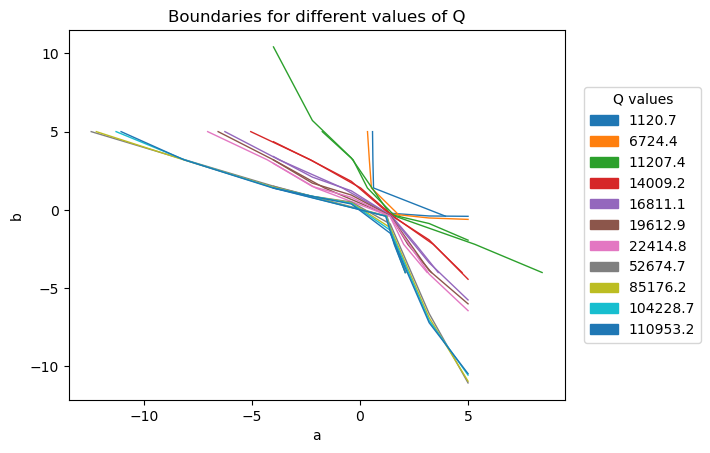

In [33]:


palette = sns.color_palette(None, np.shape(Q_values)[0])

patches = []

for k in range(0,np.shape(Q_values)[0]):

    patches.append(mpatches.Patch(color = palette[k], label ='{0:.1f}'.format(Q_values[k])))
        
    plt.plot(aas[k][(bbs_of_aas[k] < 0.99* aANDbLimit)  & (bbs_of_aas[k] > -0.99*aANDbLimit) ],
             bbs_of_aas[k][(bbs_of_aas[k] < 0.99* aANDbLimit)  & (bbs_of_aas[k] > -0.99*aANDbLimit) ], 
             color=palette[k], linewidth=1.0)
    plt.plot( aas_of_bbs[k][(aas_of_bbs[k]< 0.99* aANDbLimit) & (aas_of_bbs[k]> -0.99* aANDbLimit)] , 
             bbs[k][(aas_of_bbs[k]< 0.99* aANDbLimit) & (aas_of_bbs[k]> -0.99* aANDbLimit)],
             color=palette[k], linewidth=1.0)
    
    
plt.ylabel('b')
plt.xlabel('a')
plt.legend(handles=patches,  title="Q values", bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


plt.title("Boundaries for different values of Q")
if SaveResults == True:
    plt.savefig('Boundaries for various Q' + str(int(time.time()//1)) + '.png', bbox_inches='tight')

plt.show()    

In [ ]:
    if SaveResults == True:
        fileObj = open('Poland_Boundaries_different_Q_'  + str(int(time.time()//1)) + '.pkl', 'wb')
        pickle.dump([aas,bbs_of_aas, bbs, aas_of_bbs],fileObj)
        fileObj.close()